In [ ]:
# Movie data analysis to find what makes for a successful movie (high ROI).
# Hypothesis are: The Budget makes for high ROI.
#              : Budget does not matter, the writer is most important.
# Data used: https://www.kaggle.com/datasets/danielgrijalvas/movies

In [1]:
# import lib

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) #Plots config adjustment


In [2]:
#Data read in
Movie_data = pd.read_csv(r'C:\Users\Njabulo Zuks\Downloads\Movies.csv')

In [3]:
# Check imported data
Movie_data.shape

(7668, 15)

In [4]:
# View data
Movie_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# check for data types
Movie_data.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# check for null (missing) values
for col in Movie_data.columns:
    null_values = np.mean(Movie_data[col].isnull())
    print('{} - {}'.format(col, null_values.astype('int64')))

name - 0
rating - 0
genre - 0
year - 0
released - 0
score - 0
votes - 0
director - 0
writer - 0
star - 0
country - 0
budget - 0
gross - 0
company - 0
runtime - 0


In [8]:
# check for duplicates 
Movie_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7663    False
7664    False
7665    False
7666    False
7667    False
Length: 7668, dtype: bool

In [9]:
Movie_data.duplicated().sum() # number of duplicated rows

0

In [11]:
# Data Over View
#Top 10 Grossing Movies, simply order data by gross rev.

Movie_data.sort_values(by=['gross'], inplace = False, ascending = False).head(10)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000.0,1.670516e+09,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000.0,1.518816e+09,Marvel Studios,143.0
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000.0,1.515341e+09,Universal Pictures,137.0
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000.0,1.450027e+09,Walt Disney Animation Studios,103.0


In [15]:
# Data over view
# Top 10 Grossing Movie Genres (MG)

MG_Gross_Sum = Movie_data.groupby('genre')[['gross']].sum()
Sorted_MG_Gross_Sum = MG_Gross_Sum.sort_values('gross', ascending = False)[:10]
Sorted_MG_Gross_Sum = Sorted_MG_Gross_Sum['gross'].astype('int64') 
Sorted_MG_Gross_Sum

genre
Action       243435855754
Comedy        97175468462
Animation     80142045796
Drama         57150648537
Adventure     45916596693
Crime         21355448322
Biography     20729581801
Horror        14543329602
Family         2157897417
Mystery        2023670554
Name: gross, dtype: int64

In [16]:
# Top 10 Grossing Movie Director (MD)
MD_Gross_Sum = Movie_data.groupby('director')[['gross']].sum()
Sorted_MD_Gross_Sum = MD_Gross_Sum.sort_values('gross', ascending = False)[:10]
Sorted_MD_Gross_Sum = Sorted_MD_Gross_Sum['gross'].astype('int64') 
Sorted_MD_Gross_Sum

director
Steven Spielberg     9629049370
Anthony Russo        6844248984
Peter Jackson        6618045788
Michael Bay          6451692798
James Cameron        6248088578
David Yates          6021591899
Christopher Nolan    5153547948
J.J. Abrams          4659375464
Tim Burton           4456348890
Ron Howard           4409188200
Name: gross, dtype: int64

In [17]:
# Top 10 Grossing Movie Writers (MW)
MW_Gross_Sum = Movie_data.groupby('writer')[['gross']].sum()
Sorted_MW_Gross_Sum = MW_Gross_Sum.sort_values('gross', ascending = False)[:10]
Sorted_MW_Gross_Sum = Sorted_MW_Gross_Sum['gross'].astype('int64') 
Sorted_MW_Gross_Sum

writer
Christopher Markus    7587181621
James Cameron         6282146001
John Lasseter         4656539205
Chris Morgan          4360332296
Steve Kloves          4184681487
J.K. Rowling          4152832057
Ehren Kruger          4103317806
Cinco Paul            3911673594
Ted Elliott           3727154056
Fran Walsh            3710456904
Name: gross, dtype: int64

In [18]:
# Top 10 Grossing Movie Stars (MS)
MS_Gross_Sum = Movie_data.groupby('star')[['gross']].sum()
Sorted_MS_Gross_Sum = MS_Gross_Sum.sort_values('gross', ascending = False)[:10]
Sorted_MS_Gross_Sum = Sorted_MS_Gross_Sum['gross'].astype('int64') 
Sorted_MS_Gross_Sum

star
Robert Downey Jr.    11859526234
Tom Hanks             9952423823
Tom Cruise            9602552559
Daniel Radcliffe      7954064886
Will Smith            7947279234
Johnny Depp           7444238998
Leonardo DiCaprio     6963367648
Vin Diesel            6036312568
Dwayne Johnson        5711270624
Bruce Willis          5318951036
Name: gross, dtype: int64

In [20]:
# Top 10 Companies by Gross Rev.
Company_Gross_Sum = Movie_data.groupby('company')[['gross']].sum()
Sorted_Company_Gross_Sum = Company_Gross_Sum.sort_values('gross', ascending = False)[:10]
Sorted_Company_Gross_Sum = Sorted_Company_Gross_Sum['gross'].astype('int64') 
Sorted_Company_Gross_Sum

company
Warner Bros.             56491421806
Universal Pictures       52514188890
Columbia Pictures        43008941346
Paramount Pictures       40493607415
Twentieth Century Fox    40257053857
Walt Disney Pictures     36327887792
New Line Cinema          19883797684
Marvel Studios           15065592411
DreamWorks Animation     11873612858
Touchstone Pictures      11795832638
Name: gross, dtype: int64

In [21]:
# Data correlation 
# Firstly convert non-numeric to numeric (simply assign numeric values)

Movie_data_num = Movie_data
for col in Movie_data_num.columns:
    if(Movie_data_num[col].dtype == 'object'):
        Movie_data_num[col] = Movie_data_num[col].astype('category')
        Movie_data_num[col] = Movie_data_num[col].cat.codes

Movie_data_num.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
5,2109,6,10,1980,2502,6.4,123000.0,2528,4362,241,55,550000.0,39754601.0,1812,95.0
6,5574,6,0,1980,1771,7.9,188000.0,1412,838,1277,55,27000000.0,115229890.0,2281,133.0
7,4436,6,3,1980,699,8.2,330000.0,1829,1769,2240,55,18000000.0,23402427.0,631,129.0
8,5281,4,0,1980,1753,6.8,101000.0,2306,1979,877,55,54000000.0,108185706.0,883,127.0
9,6213,6,3,1980,2286,7.0,10000.0,2864,423,589,55,10000000.0,15795189.0,2272,100.0


In [23]:
#check if the above code worked (i.e only non_numeric variables were affected)
# use original data for check against
Movie_data = pd.read_csv(r'C:\Users\Njabulo Zuks\Downloads\Movies.csv')
Movie_data.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [24]:
# Viz Data Correlation
Movie_data_num.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174


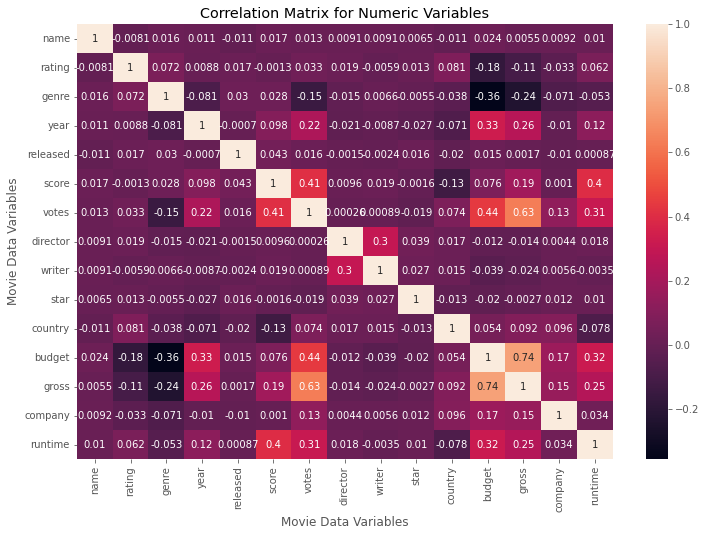

In [25]:
# For better Viz, correlation matrix used
correlation_matrix = Movie_data_num.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Variables')
plt.xlabel('Movie Data Variables')
plt.ylabel('Movie Data Variables')
plt.show()


In [26]:
# sort for better readability

sorted_matrix = Movie_data_num.corr()
corr_pairs = sorted_matrix.unstack()
corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.320447
         gross       0.245216
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [27]:
#Group for better readability
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.356564
genre    budget    -0.356564
         gross     -0.235650
gross    genre     -0.235650
rating   budget    -0.176002
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [28]:
# Filter correlation
High_correlation = sorted_pairs[(sorted_pairs) > 0.5]
High_correlation

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

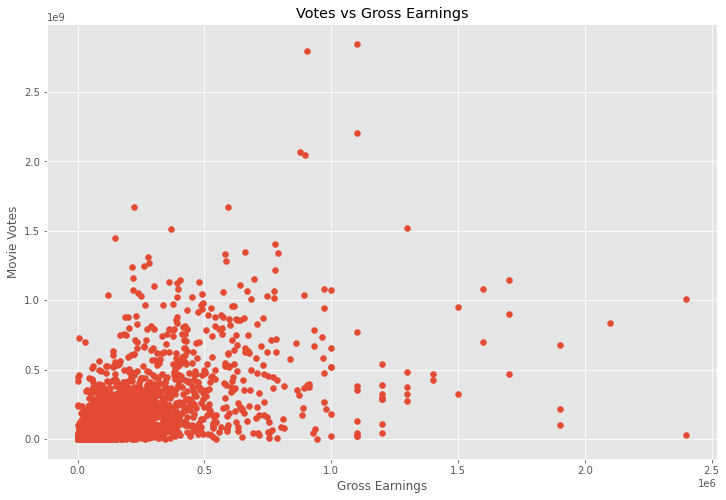

In [29]:
# Plots, for better Viz of correlation results

# Votes vs Gross
plt.scatter(x = Movie_data['votes'], y = Movie_data['gross'])
plt.title('Votes vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Movie Votes')
plt.show()

<AxesSubplot:xlabel='votes', ylabel='gross'>

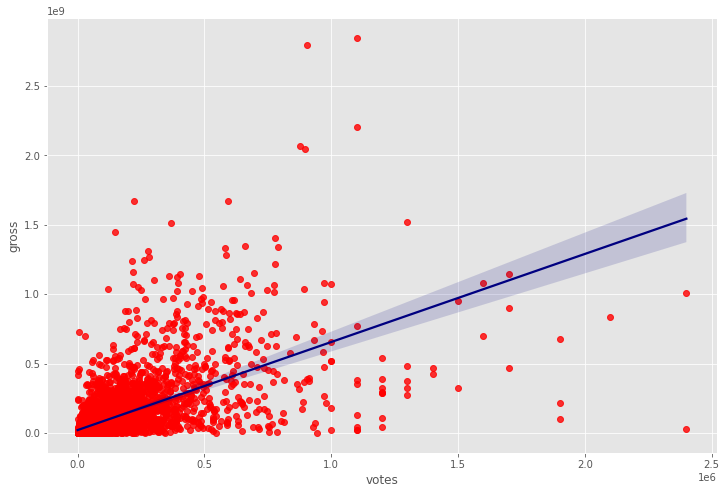

In [30]:
# Regression plot for better viz (via seaborn)

sns.regplot(x = 'votes', y = 'gross', data = Movie_data, scatter_kws = {"color": "red"}, line_kws = {"color": "navy"})


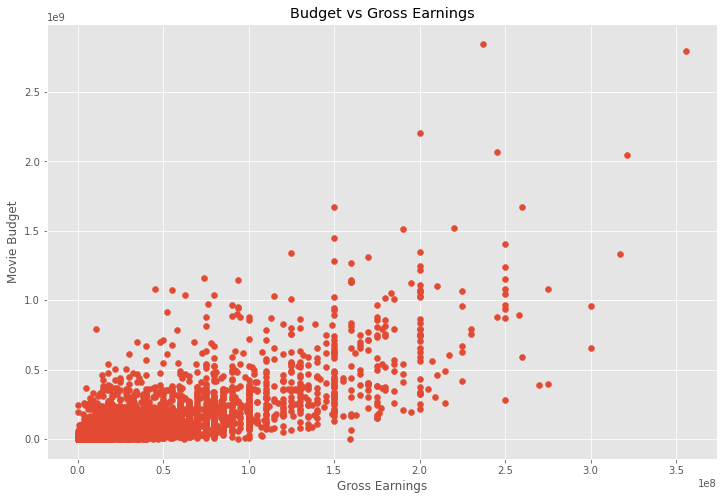

In [31]:
# budget vs Gross
# Budget vs Gross
plt.scatter(x = Movie_data['budget'], y = Movie_data['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Movie Budget')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

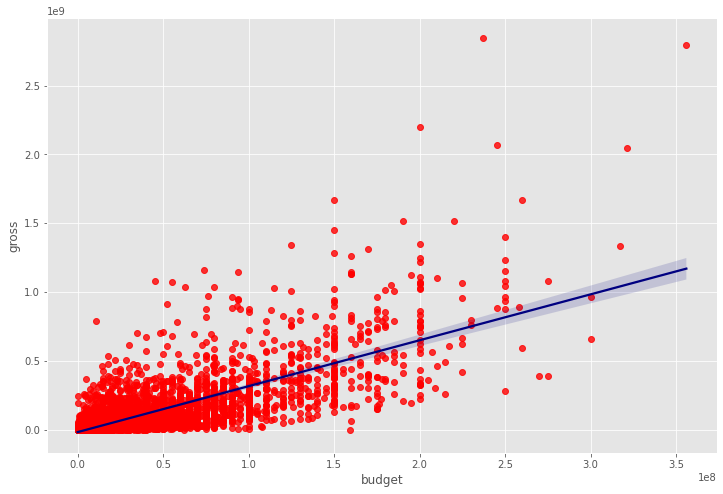

In [32]:
# Regression plot for better viz (via seaborn)

sns.regplot(x = 'budget', y = 'gross', data = Movie_data, scatter_kws = {"color": "red"}, line_kws = {"color": "navy"})


In [ ]:
# Findings
# Budget has the highest correlation to Gross earnings 
# Writer has significantly low correlation to Gross earnings

# Surprise findings
# Votes have the second highest correlation to Gross earnings (maybe due to a higher number of viewers, people who saw the movie)
# Runtime and Year of realise have the third highest correlation to Gross earnings